In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import os
from typing import Any, Dict, Optional, Tuple
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [136]:
pd.options.display.width = 1200
matplotlib.rc('figure', figsize=(10,3), dpi=200)

In [137]:
datafolder = "/content/drive/MyDrive/Colab Notebooks/AI4T/CNN Trading Agent/Data/"

In [138]:
messages  = pd.read_csv(datafolder + "/lab2/amz/AMZN_2012-06-21_34200000_57600000_message_1.csv")
orderbook = pd.read_csv(datafolder + "/lab2/amz/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv")

print("History messagges")
print(messages)
print("Orderbook")
print(orderbook)

History messagges
       34200.017459617  5          0    1  2238200  -1
0         34200.189608  1   11885113   21  2238100   1
1         34200.190226  4   11885113   21  2238100   1
2         34200.190226  4   11534792   26  2237500   1
3         34200.372780  5          0  100  2238400  -1
4         34200.375671  5          0  100  2238400  -1
...                ... ..        ...  ...      ...  ..
57509     57599.545828  4  282917222    9  2205100   1
57510     57599.545828  4  286916542   51  2205100   1
57511     57599.903989  3  287142900  100  2206200  -1
57512     57599.958245  1  287174077  100  2206300  -1
57513     57599.959360  3  287174077  100  2206300  -1

[57514 rows x 6 columns]
Orderbook
       2239500  100  2231800  100.1
0      2239500  100  2238100     21
1      2239500  100  2237500    100
2      2239500  100  2237500     74
3      2239500  100  2237500     74
4      2239500  100  2237500     74
...        ...  ...      ...    ...
57509  2206200  100  2205100    30

In [139]:
# take from readme the description of columns
COLUMN_NAMES = {"orderbook" : ["sell", "vsell", "buy", "vbuy"],
                "messages" : ["time","event_type","order_id","size","price","direction"]}

messages  = pd.read_csv(datafolder + "/lab2/amz/AMZN_2012-06-21_34200000_57600000_message_1.csv", names=COLUMN_NAMES["messages"])
orderbook = pd.read_csv(datafolder + "/lab2/amz/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMN_NAMES["orderbook"])

print("History messages")
print(messages)

History messages
               time  event_type   order_id  size    price  direction
0      34200.017460           5          0     1  2238200         -1
1      34200.189608           1   11885113    21  2238100          1
2      34200.190226           4   11885113    21  2238100          1
3      34200.190226           4   11534792    26  2237500          1
4      34200.372780           5          0   100  2238400         -1
...             ...         ...        ...   ...      ...        ...
57510  57599.545828           4  282917222     9  2205100          1
57511  57599.545828           4  286916542    51  2205100          1
57512  57599.903989           3  287142900   100  2206200         -1
57513  57599.958245           1  287174077   100  2206300         -1
57514  57599.959360           3  287174077   100  2206300         -1

[57515 rows x 6 columns]


In [140]:
print("Orderbook")
print(orderbook)

Orderbook
          sell  vsell      buy  vbuy
0      2239500    100  2231800   100
1      2239500    100  2238100    21
2      2239500    100  2237500   100
3      2239500    100  2237500    74
4      2239500    100  2237500    74
...        ...    ...      ...   ...
57510  2206200    100  2205100   300
57511  2206200    100  2205100   249
57512  2206400    100  2205100   249
57513  2206300    100  2205100   249
57514  2206400    100  2205100   249

[57515 rows x 4 columns]


In [141]:
# merge data to combine orderbook with time and messages
all_lob_data = messages.copy()
all_lob_data[COLUMN_NAMES["orderbook"]] = orderbook
all_lob_data

time  event_type   order_id  size    price  direction     sell  vsell      buy  vbuy
0      34200.017460           5          0     1  2238200         -1  2239500    100  2231800   100
1      34200.189608           1   11885113    21  2238100          1  2239500    100  2238100    21
2      34200.190226           4   11885113    21  2238100          1  2239500    100  2237500   100
3      34200.190226           4   11534792    26  2237500          1  2239500    100  2237500    74
4      34200.372780           5          0   100  2238400         -1  2239500    100  2237500    74
...             ...         ...        ...   ...      ...        ...      ...    ...      ...   ...
57510  57599.545828           4  282917222     9  2205100          1  2206200    100  2205100   300
57511  57599.545828           4  286916542    51  2205100          1  2206200    100  2205100   249
57512  57599.903989           3  287142900   100  2206200         -1  2206400    100  2205100   249
57513  57599.958245           1  287174077   100  2206300         -1  2206300    100  2205100   249
57514  57599.959360           3  287174077   100  2206300         -1  2206400    100  2205100   249

[57515 rows x 10 columns]

In [142]:
from datetime import datetime, timedelta

def add_readable_time(start_date, df):
  """change index of dataframe"""

  df = df.copy()
  df.insert(0, "date", [start_date + timedelta(seconds=i) for i in df["time"]])
  return df

In [143]:
start_date = datetime.strptime("21.06.2012", "%d.%m.%Y")
lob_data_w_date = add_readable_time(start_date, all_lob_data)
print(lob_data_w_date)

                            date          time  event_type   order_id  size    price  direction     sell  vsell      buy  vbuy
0     2012-06-21 09:30:00.017460  34200.017460           5          0     1  2238200         -1  2239500    100  2231800   100
1     2012-06-21 09:30:00.189608  34200.189608           1   11885113    21  2238100          1  2239500    100  2238100    21
2     2012-06-21 09:30:00.190226  34200.190226           4   11885113    21  2238100          1  2239500    100  2237500   100
3     2012-06-21 09:30:00.190226  34200.190226           4   11534792    26  2237500          1  2239500    100  2237500    74
4     2012-06-21 09:30:00.372780  34200.372780           5          0   100  2238400         -1  2239500    100  2237500    74
...                          ...           ...         ...        ...   ...      ...        ...      ...    ...      ...   ...
57510 2012-06-21 15:59:59.545828  57599.545828           4  282917222     9  2205100          1  2206200    100

In [144]:
AMZN = lob_data_w_date.drop(columns=["time", "size", "vsell", "vbuy"])
AMZN = AMZN[AMZN.event_type==4] # Consider only "Executed visible limit order"
AMZN.index = AMZN["date"]
AMZN = AMZN.drop(columns=["date"])
AMZN.head()
# some ("unique") order_ids appear multiple times. The entry of such order have all the same values except for the time/date
# for the moment: I keep all of them

event_type  order_id    price  direction     sell      buy
date                                                                                  
2012-06-21 09:30:00.190226           4  11885113  2238100          1  2239500  2237500
2012-06-21 09:30:00.190226           4  11534792  2237500          1  2239500  2237500
2012-06-21 09:30:00.391413           4  14585251  2239500         -1  2239600  2237500
2012-06-21 09:30:00.391413           4   3911376  2239600         -1  2239600  2237500
2012-06-21 09:30:00.391413           4  16202496  2239600         -1  2239900  2237500

In [145]:
# compute the mid_price
resample = 2 # s

AMZN = AMZN[["sell","buy"]].resample("{}s".format(resample)).agg({"sell" : 'min', "buy" : 'max'})
AMZN.info() 
AMZN["mid_price"] = (AMZN["sell"] + AMZN["buy"])/2

# fill nan values
AMZN["mid_price"] = AMZN["mid_price"].fillna(method="ffill")
AMZN.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11700 entries, 2012-06-21 09:30:00 to 2012-06-21 15:59:58
Freq: 2S
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sell    2309 non-null   float64
 1   buy     2309 non-null   float64
dtypes: float64(2)
memory usage: 274.2 KB


sell        buy  mid_price
date                                                
2012-06-21 09:30:00  2239500.0  2238400.0  2238950.0
2012-06-21 09:30:02        NaN        NaN  2238950.0
2012-06-21 09:30:04        NaN        NaN  2238950.0
2012-06-21 09:30:06  2240200.0  2239100.0  2239650.0
2012-06-21 09:30:08        NaN        NaN  2239650.0

In [146]:
# plot the mid price along with the rm, and the bollinger bands
window_size = resample * 30  # resample (s) * times
F = 2
AMZN["rm"] = AMZN["mid_price"].rolling(window_size).mean()
# upper band
AMZN["ub"] = AMZN.rm + (F * AMZN["mid_price"].rolling(window_size).std())
# lower band
AMZN["lb"] = AMZN.rm - (F * AMZN["mid_price"].rolling(window_size).std())

dates = AMZN.index.values

# plot the mid prices
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=dates, y=AMZN.mid_price, mode='lines', name="mid_prices",line=dict(color="blue")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=AMZN.rm, mode='lines', name="rm",line=dict(color="red")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=AMZN.ub, mode='lines', name="up",line=dict(color="green")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=AMZN.lb, mode='lines', name="lb",line=dict(color="orange")),
                row=1, col=1)

Output hidden; open in https://colab.research.google.com to view.

In [147]:
# compute the actual price along the day

# use only executed orders:
#OrderEvent.EXECUTION,
#OrderEvent.HIDDEN_EXECUTION
ords_exec = lob_data_w_date[(lob_data_w_date["event_type"].isin([4,5]))]
ords_exec.index = ords_exec["date"]
AMZN["actual_price"] = ords_exec[["price"]].resample("{}s".format(resample)).first()
AMZN["actual_price"] = AMZN["actual_price"].fillna(method="ffill")
AMZN.head()

sell        buy  mid_price  rm  ub  lb  actual_price
date                                                                          
2012-06-21 09:30:00  2239500.0  2238400.0  2238950.0 NaN NaN NaN     2238200.0
2012-06-21 09:30:02        NaN        NaN  2238950.0 NaN NaN NaN     2238800.0
2012-06-21 09:30:04        NaN        NaN  2238950.0 NaN NaN NaN     2239200.0
2012-06-21 09:30:06  2240200.0  2239100.0  2239650.0 NaN NaN NaN     2239300.0
2012-06-21 09:30:08        NaN        NaN  2239650.0 NaN NaN NaN     2239300.0

In [148]:
fig = AMZN[["mid_price","actual_price"]].plot()
fig.show()

In [149]:
def past_avg_mid_prices(df, sym, window_shape=3):
   """computes the avg mid_price of a stock in the past K timeslots wrt d, 'd' included"""

   K = window_shape
   return df.eval(sym).rolling(K, closed="right").mean() # the moment d is included

In [150]:
def future_avg_mid_prices(df, sym, window_shape=3):
  """computes the avg mid_price of a stock in the future K timeslots wrt d, 'd' excluded"""

  K = window_shape
  return df.eval(sym).rolling(K, closed="right").mean().shift(-K) # center must be True, the shift is -2 since we are looking at the future, d excluded

In [151]:
K = window_size
AMZN["B_d"] = past_avg_mid_prices(AMZN,"mid_price", window_shape=K)
AMZN["F_d"] = future_avg_mid_prices(AMZN,"mid_price", window_shape=K)
AMZN["slope_d"] = AMZN.F_d - AMZN.B_d
AMZN["FB_mean"] = (AMZN.F_d + AMZN.B_d)/2

# what "mean" to use? Global mean? The mean defined over the K past days? others?
AMZN["global_mean"] = AMZN.mid_price.mean()
AMZN["cum_mean"] = AMZN.mid_price.expanding().mean()

# how to properly define the std dev? Over the whole period of 2K days? Only the left portion (K past days)? others?

# ALT. 1: GLOBAL MEAN AND PAST K DAYS
AMZN["std_dev_ALT1"] = np.sqrt( ((AMZN.mid_price - AMZN.global_mean)**2).rolling(K).sum() / K )

# ALT. 2: B_d MEAN AND PAST K DAYS
AMZN["lists_past"] = [i.values for i in list(AMZN.mid_price.rolling(K))]
AMZN["std_dev_ALT2"] = [np.sqrt(i.sum()/K) for i in ((AMZN.lists_past - AMZN.B_d)**2).values]

# ALT. 3: FB MEAN and 2K (PAST&FUTURE) DAYS
AMZN["lists_future"] = AMZN.lists_past.shift(-K) # it causes problem later -> must remove the rows with nan
AMZN["partial_dev_1"] = [i.sum()/K for i in ((AMZN.lists_past - AMZN.FB_mean)**2).values]

AMZN.dropna(subset=["lists_past","lists_future"], inplace=True)

AMZN["partial_dev_2"] = [i.sum()/(2*K) for i in ((AMZN.lists_future - AMZN.FB_mean)**2).values]
AMZN["std_dev_ALT3"] = np.sqrt( (AMZN.partial_dev_1 + AMZN.partial_dev_2)/2 )

AMZN.drop(columns=["partial_dev_1","partial_dev_2","lists_past","lists_future"], inplace=True)
AMZN.dropna(subset=["std_dev_ALT1","std_dev_ALT2","std_dev_ALT3"], inplace=True)
AMZN

sell        buy  mid_price            rm            ub            lb  actual_price           B_d           F_d      slope_d       FB_mean   global_mean      cum_mean  std_dev_ALT1  std_dev_ALT2  std_dev_ALT3
date                                                                                                                                                                                                                                     
2012-06-21 09:31:58        NaN        NaN  2236550.0  2.240742e+06  2.244371e+06  2.237114e+06     2236300.0  2.240742e+06  2.238079e+06 -2663.333333  2.239411e+06  2.227601e+06  2.240742e+06  13264.428321   1798.930817   1888.490588
2012-06-21 09:32:00  2237000.0  2235000.0  2236000.0  2.240693e+06  2.244496e+06  2.236891e+06     2237000.0  2.240693e+06  2.238132e+06 -2561.666667  2.239412e+06  2.227601e+06  2.240665e+06  13227.776773   1885.481076   1900.609140
2012-06-21 09:32:02  2237000.0  2235000.0  2236000.0  2.240644e+06  2.244611e+06  2.236677e+06     2237000.0  2.240644e+06  2.238184e+06 -2460.000000  2.239414e+06  2.227601e+06  2.240590e+06  13191.023389   1967.000501   1912.671969
2012-06-21 09:32:04  2241900.0  2235000.0  2238450.0  2.240636e+06  2.244620e+06  2.236652e+06     2238600.0  2.240636e+06  2.238243e+06 -2392.500000  2.239440e+06  2.227601e+06  2.240556e+06  13184.009574   1975.202345   1916.393946
2012-06-21 09:32:06        NaN        NaN  2238450.0  2.240616e+06  2.244632e+06  2.236600e+06     2238600.0  2.240616e+06  2.238302e+06 -2313.333333  2.239459e+06  2.227601e+06  2.240523e+06  13166.629539   1991.094583   1921.452404
...                        ...        ...        ...           ...           ...           ...           ...           ...           ...          ...           ...           ...           ...           ...           ...           ...
2012-06-21 15:57:50  2207800.0  2207900.0  2207850.0  2.208044e+06  2.208641e+06  2.207447e+06     2207900.0  2.208044e+06  2.207262e+06  -781.666667  2.207653e+06  2.227601e+06  2.227713e+06  19558.696575    295.957720    540.289917
2012-06-21 15:57:52  2207800.0  2207700.0  2207750.0  2.208046e+06  2.208639e+06  2.207453e+06     2207700.0  2.208046e+06  2.207227e+06  -819.166667  2.207636e+06  2.227601e+06  2.227711e+06  19557.000698    294.008456    559.284443
2012-06-21 15:57:54  2207800.0  2207500.0  2207650.0  2.208032e+06  2.208624e+06  2.207441e+06     2207500.0  2.208032e+06  2.207199e+06  -833.333333  2.207616e+06  2.227601e+06  2.227710e+06  19570.325145    293.516751    567.783367
2012-06-21 15:57:56  2207800.0  2207500.0  2207650.0  2.208023e+06  2.208622e+06  2.207425e+06     2207500.0  2.208023e+06  2.207173e+06  -850.000000  2.207598e+06  2.227601e+06  2.227708e+06  19579.538964    296.713479    576.716640
2012-06-21 15:57:58        NaN        NaN  2207650.0  2.208014e+06  2.208618e+06  2.207410e+06     2207700.0  2.208014e+06  2.207140e+06  -874.166667  2.207577e+06  2.227601e+06  2.227706e+06  19588.748450    299.595793    591.370047

[11581 rows x 16 columns]

In [152]:
AMZN.loc[:,"label_ALT1"] = np.nan
AMZN.loc[:,"label_ALT2"] = np.nan
AMZN.loc[:,"label_ALT3"] = np.nan

Create the labels according to ALT1

In [153]:
AMZN.loc[[AMZN.slope_d > 0 ][0].values, "label_ALT1"] = 2 # rise
AMZN.loc[[AMZN.slope_d < 0 ][0].values, "label_ALT1"] = 3 # fall
AMZN.loc[[ (AMZN.mid_price > (AMZN.global_mean + AMZN.std_dev_ALT1)) & (AMZN.slope_d > 0) ][0].values, "label_ALT1"] = 1 # rise plus
AMZN.loc[[ (AMZN.mid_price < (AMZN.global_mean - AMZN.std_dev_ALT1)) & (AMZN.slope_d < 0) ][0].values, "label_ALT1"] = 4 # fall plus

Create the labels according to ALT2

In [154]:
AMZN.loc[[AMZN.slope_d > 0 ][0].values, "label_ALT2"] = 2 # rise
AMZN.loc[[AMZN.slope_d < 0 ][0].values, "label_ALT2"] = 3 # fall
AMZN.loc[[ (AMZN.mid_price > (AMZN.B_d + AMZN.std_dev_ALT2)) & (AMZN.slope_d > 0) ][0].values, "label_ALT2"] = 1 # rise plus
AMZN.loc[[ (AMZN.mid_price < (AMZN.B_d - AMZN.std_dev_ALT2)) & (AMZN.slope_d < 0) ][0].values, "label_ALT2"] = 4 # fall plus

Create the labels according to ALT3

In [155]:
AMZN.loc[[AMZN.slope_d > 0 ][0].values, "label_ALT3"] = 2 # rise
AMZN.loc[[AMZN.slope_d < 0 ][0].values, "label_ALT3"] = 3 # fall
AMZN.loc[[ (AMZN.mid_price > (AMZN.FB_mean + AMZN.std_dev_ALT3)) & (AMZN.slope_d > 0) ][0].values, "label_ALT3"] = 1 # rise plus
AMZN.loc[[ (AMZN.mid_price < (AMZN.FB_mean - AMZN.std_dev_ALT3)) & (AMZN.slope_d < 0) ][0].values, "label_ALT3"] = 4 # fall plus

PLOT ALT1

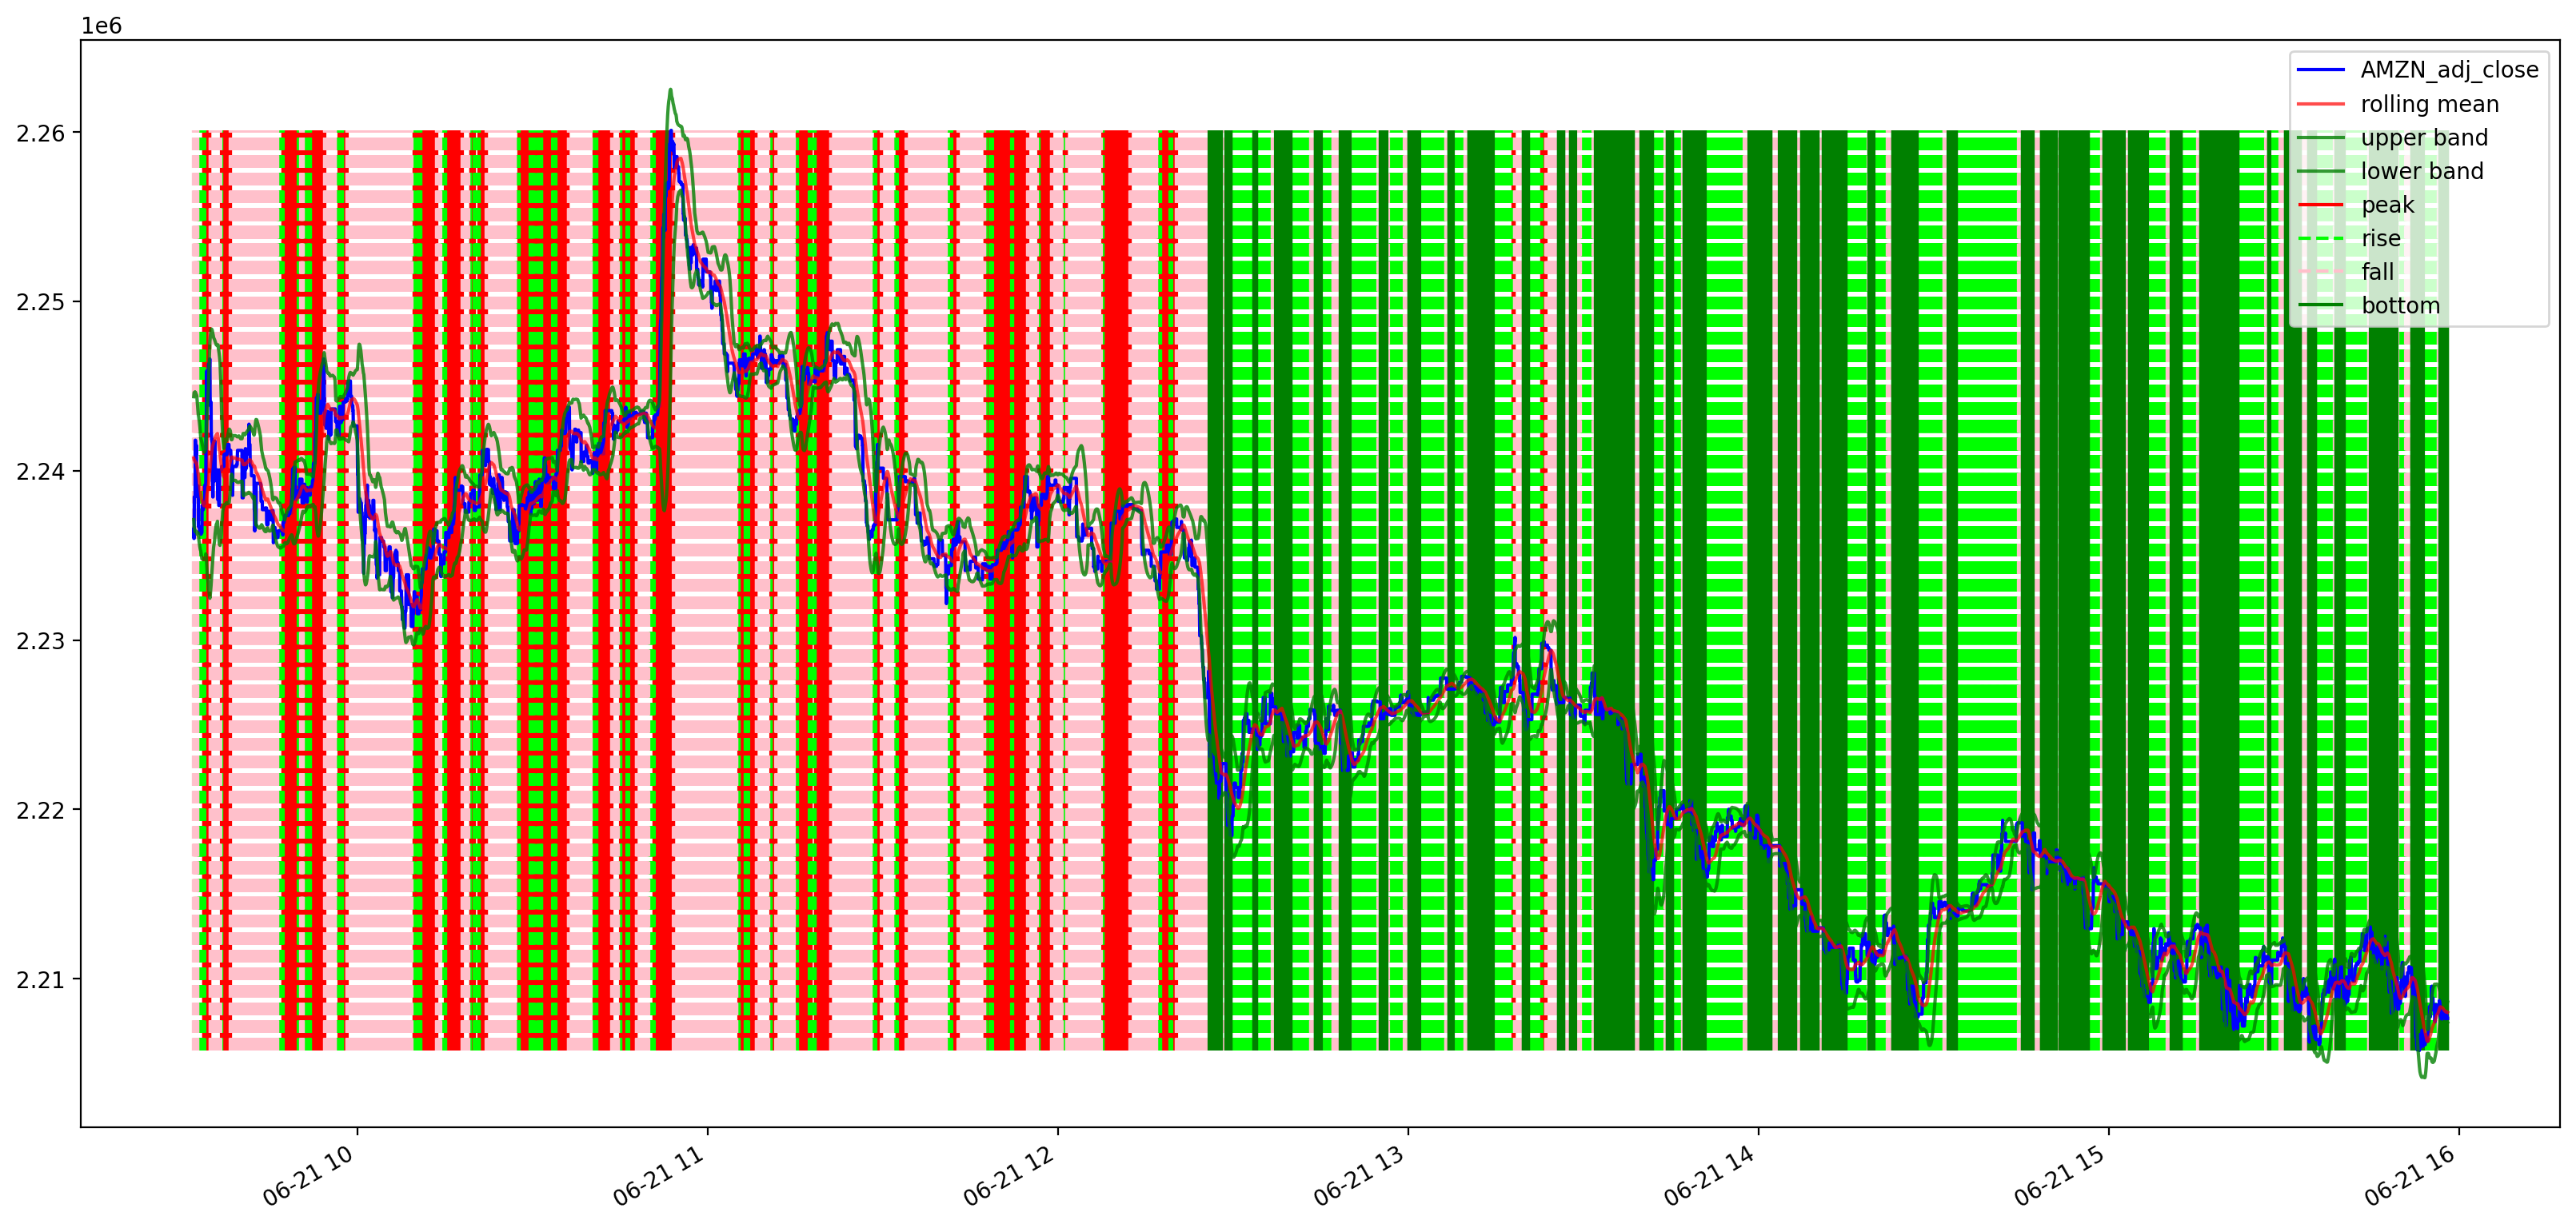

In [161]:
new_dates = AMZN.index.values

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(new_dates, AMZN.mid_price, color = 'b')
ax.vlines(AMZN[AMZN.label_ALT1==1].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), label="peak", color="red", linestyle="solid")   # peak
ax.vlines(AMZN[AMZN.label_ALT1==2].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), label="rise", color="lime", linestyle="dashed")  # rise
ax.vlines(AMZN[AMZN.label_ALT1==3].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), label="fall", color="pink", linestyle="dashed")  # fall
ax.vlines(AMZN[AMZN.label_ALT1==4].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), label="bottom", color="green", linestyle="solid") # bottom

ax.plot(new_dates, AMZN.rm, color = 'r', alpha = 0.7)
ax.plot(new_dates, AMZN.ub, color = 'g', alpha = 0.8)
ax.plot(new_dates, AMZN.lb, color = 'g', alpha = 0.8)
ax.legend(("AMZN_adj_close", 'rolling mean', 'upper band', 'lower band','peak', 'rise', 'fall', 'bottom'))

plt.gcf().autofmt_xdate()
plt.show()

PLOT ALT2

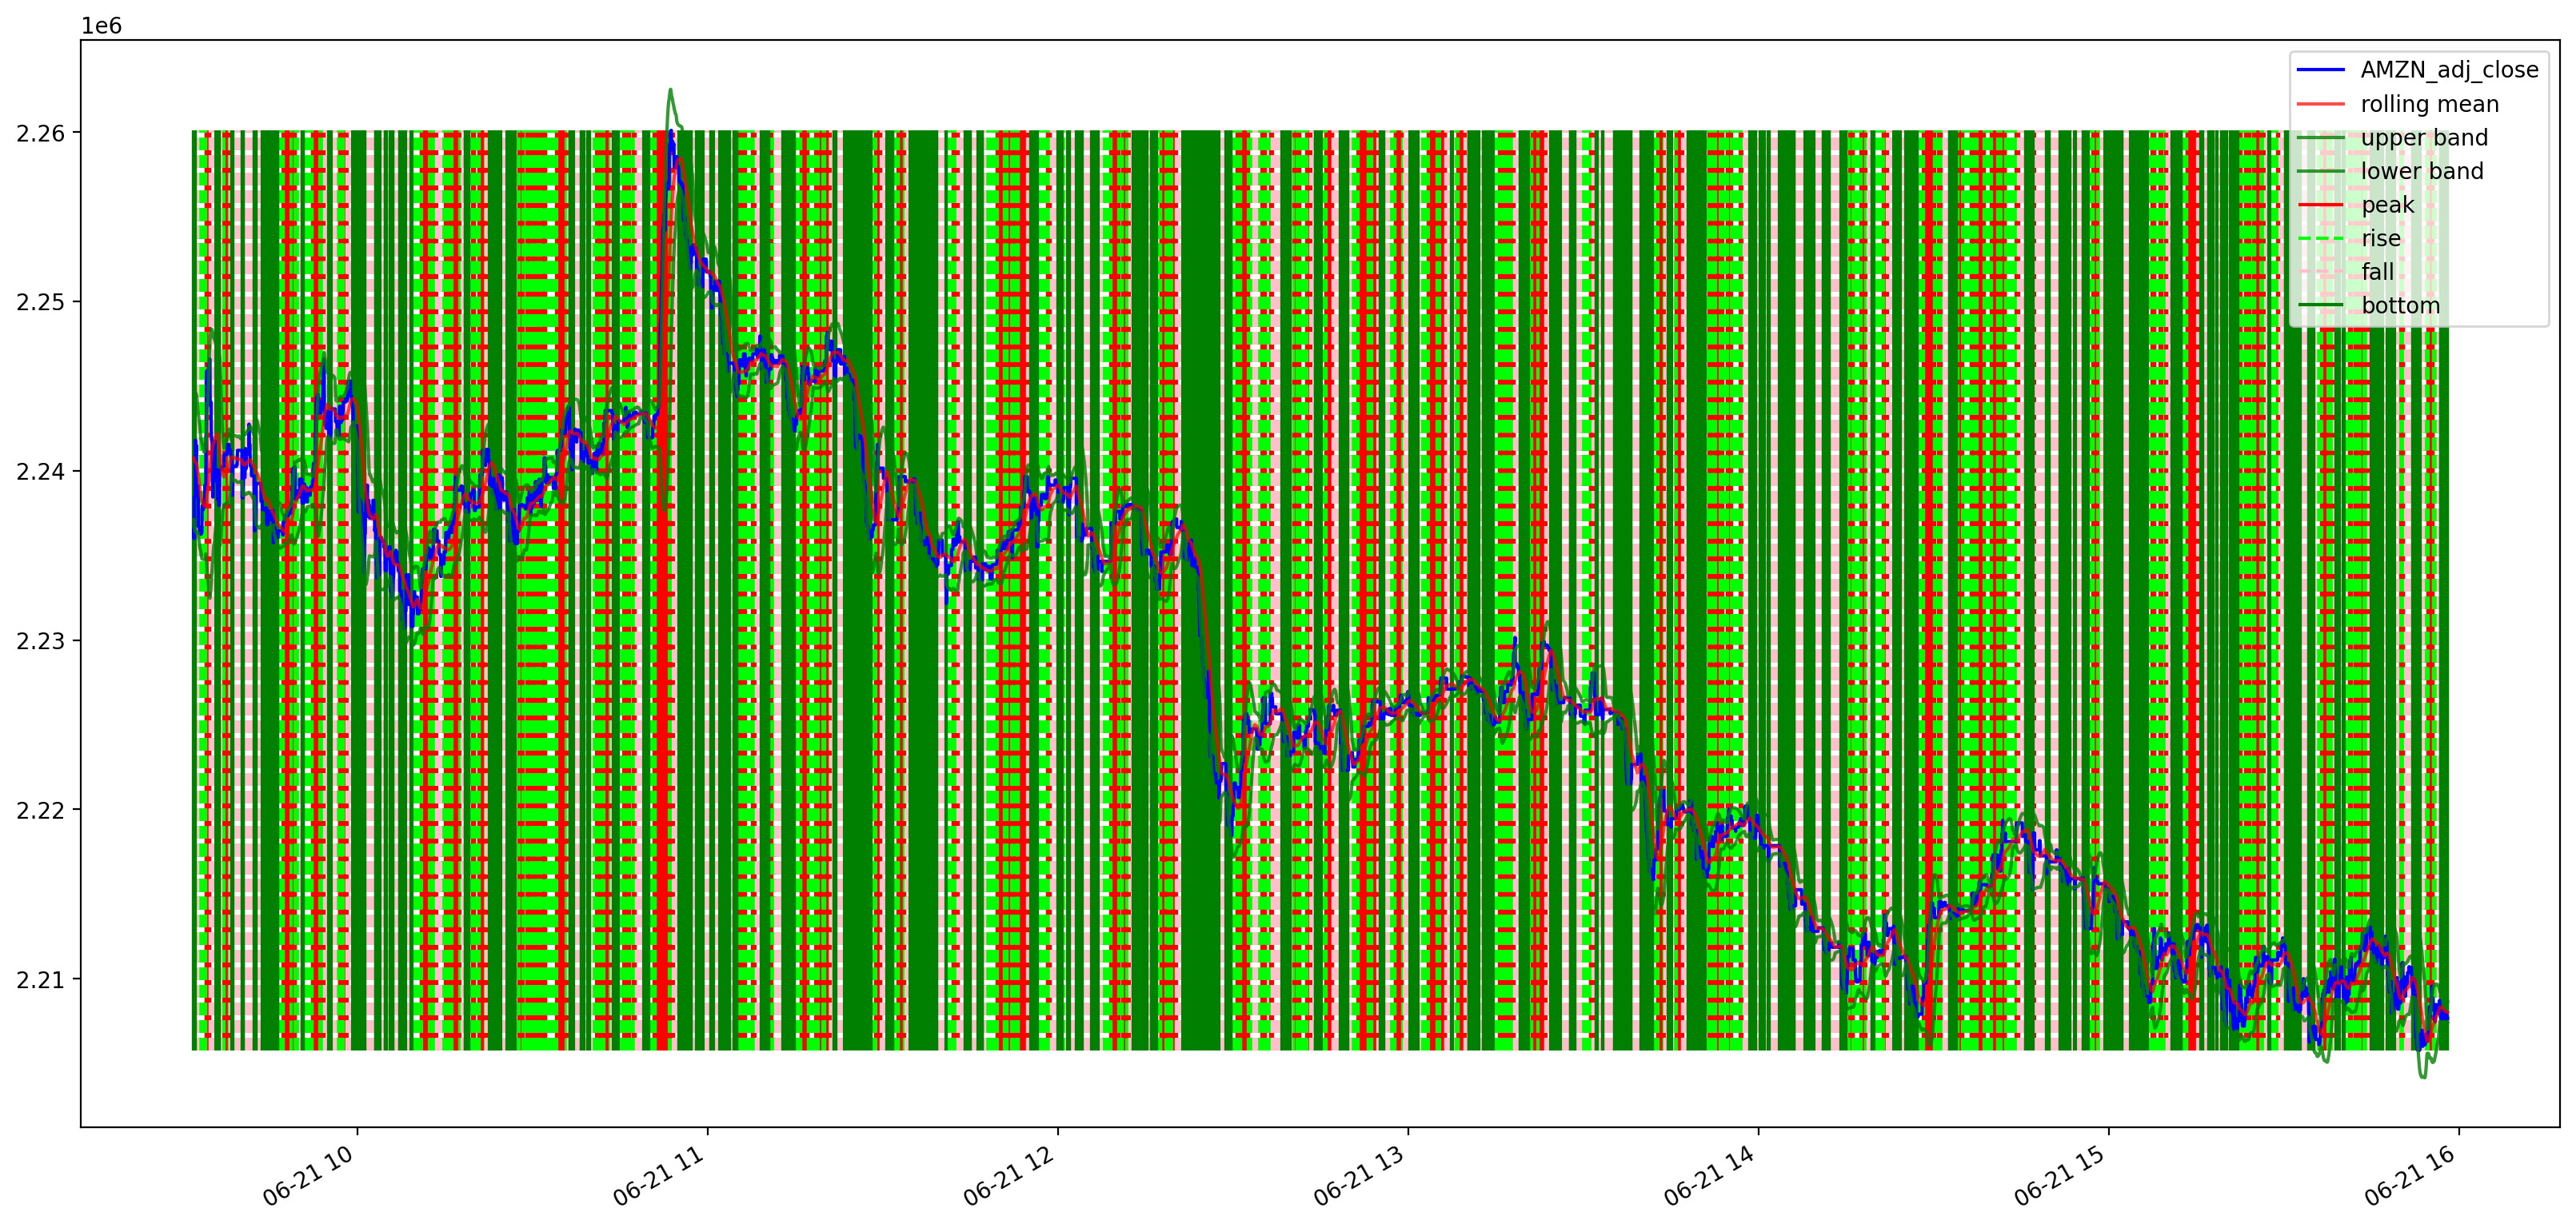

In [162]:
new_dates = AMZN.index.values

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(new_dates, AMZN.mid_price, color = 'b')
ax.vlines(AMZN[AMZN.label_ALT2==1].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="red", linestyle="solid")   # peak
ax.vlines(AMZN[AMZN.label_ALT2==2].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="lime", linestyle="dashed")  # rise
ax.vlines(AMZN[AMZN.label_ALT2==3].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="pink", linestyle="dashed")  # fall
ax.vlines(AMZN[AMZN.label_ALT2==4].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="green", linestyle="solid") # bottom

ax.plot(new_dates, AMZN.rm, color = 'r', alpha = 0.7)
ax.plot(new_dates, AMZN.ub, color = 'g', alpha = 0.8)
ax.plot(new_dates, AMZN.lb, color = 'g', alpha = 0.8)
ax.legend(("AMZN_adj_close", 'rolling mean', 'upper band', 'lower band','peak', 'rise', 'fall', 'bottom'))

plt.gcf().autofmt_xdate()
plt.show()

In [191]:
# plot the mid prices
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.mid_price, mode='lines', name="mid_prices",line=dict(color="blue")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.rm, mode='lines', name="rm",line=dict(color="red")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.ub, mode='lines', name="up",line=dict(color="green")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.lb, mode='lines', name="lb",line=dict(color="orange")),
                row=1, col=1)

# Add the judgment condition lines
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.B_d + AMZN.std_dev_ALT2), mode='lines', name="(mu + std_dev)",line=dict(color="black")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.B_d - AMZN.std_dev_ALT2), mode='lines', name="(mu - std_dev)",line=dict(color="purple")),
                row=1, col=1)

# Add the vertical lignes to define the labels

peaks = AMZN[AMZN.label_ALT2==1].index.values
rise = AMZN[AMZN.label_ALT2==2].index.values
fall = AMZN[AMZN.label_ALT2==3].index.values
bottom = AMZN[AMZN.label_ALT2==4].index.values

jump = 50
vlines = [peaks[::jump], bottom[::jump], fall[::jump], rise[::jump]]
name = ["peak", "bottom", "fall", "rise"]

for i in range(len(vlines)):
  for line in vlines[i]:
    fig.add_vline(x=line.astype(str), line_width=1, line_color="red" if i%2==0 else "green", line_dash="solid" if i<2 else "dash")


fig.show()

Output hidden; open in https://colab.research.google.com to view.

PLOT ALT3

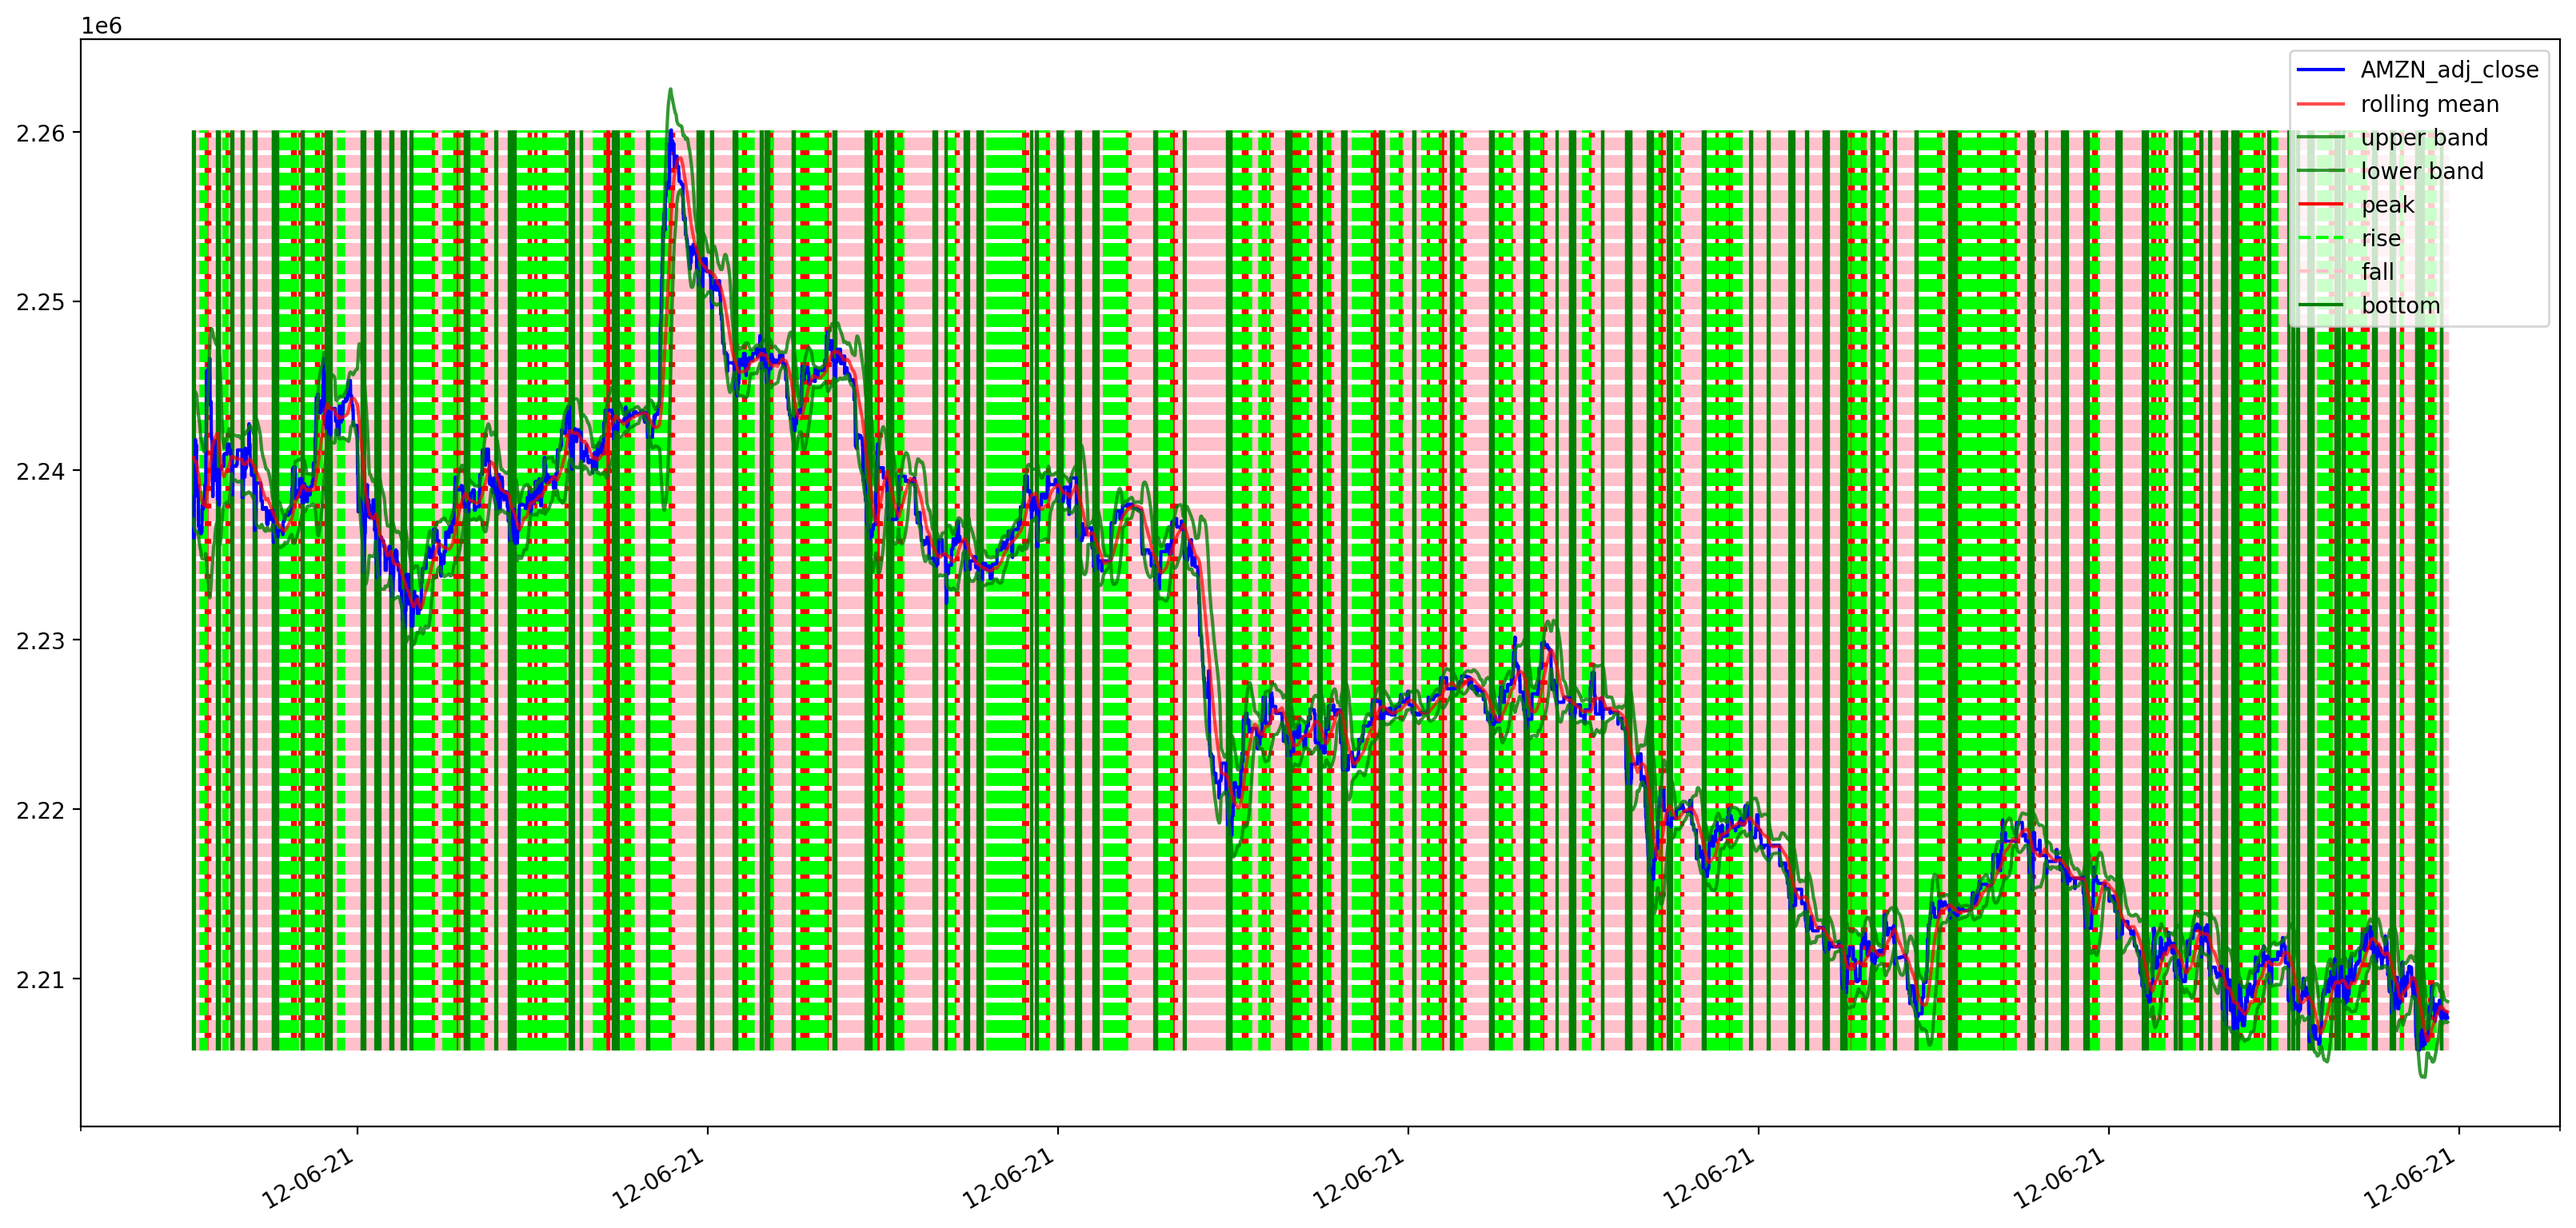

In [164]:
new_dates = AMZN.index.values

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(new_dates, AMZN.mid_price, color = 'b')
ax.vlines(AMZN[AMZN.label_ALT3==1].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="red", linestyle="solid")   # peak
ax.vlines(AMZN[AMZN.label_ALT3==2].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="lime", linestyle="dashed")  # rise
ax.vlines(AMZN[AMZN.label_ALT3==3].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="pink", linestyle="dashed")  # fall
ax.vlines(AMZN[AMZN.label_ALT3==4].index.values, ymin=AMZN.mid_price.min(), ymax=AMZN.mid_price.max(), color="green", linestyle="solid") # bottom

ax.plot(new_dates, AMZN.rm, color = 'r', alpha = 0.7)
ax.plot(new_dates, AMZN.ub, color = 'g', alpha = 0.8)
ax.plot(new_dates, AMZN.lb, color = 'g', alpha = 0.8)
ax.legend(("AMZN_adj_close", 'rolling mean', 'upper band', 'lower band','peak', 'rise', 'fall', 'bottom'))

date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_minor_locator(mdates.DayLocator()) # set a simple tick each day
plt.gcf().autofmt_xdate()
plt.show()

In [192]:
# plot the mid prices
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.mid_price, mode='lines', name="mid_prices",line=dict(color="blue")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.rm, mode='lines', name="rm",line=dict(color="red")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.ub, mode='lines', name="up",line=dict(color="green")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.lb, mode='lines', name="lb",line=dict(color="orange")),
                row=1, col=1)

# Add the judgment condition lines
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.B_d + AMZN.std_dev_ALT2), mode='lines', name="(mu + std_dev)",line=dict(color="black")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.B_d - AMZN.std_dev_ALT2), mode='lines', name="(mu - std_dev)",line=dict(color="purple")),
                row=1, col=1)

# Add the vertical lines for the labels
peaks = AMZN[AMZN.label_ALT3==1].index.values
rise = AMZN[AMZN.label_ALT3==2].index.values
fall = AMZN[AMZN.label_ALT3==3].index.values
bottom = AMZN[AMZN.label_ALT3==4].index.values

jump = 50
vlines = [peaks[::jump], bottom[::jump], fall[::jump], rise[::jump]]

for i in range(len(vlines)):
  for line in vlines[i]:
    fig.add_vline(x=line.astype(str), line_width=1, line_color="red" if i%2==0 else "green", line_dash="solid" if i<2 else "dash")


fig.show()

Output hidden; open in https://colab.research.google.com to view.

###Visualize the Judgement Condition on a plot

for the ALT.2

In [194]:
# plot the mid prices
marker_size = 4

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.mid_price, mode='lines', name="mid_prices",line=dict(color="blue")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT2==1].index.values, y=AMZN[AMZN.label_ALT2==1].mid_price.values, mode='markers', marker=dict(color="red", size=marker_size), name="peak"),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT2==2].index.values, y=AMZN[AMZN.label_ALT2==2].mid_price.values, mode='markers', marker=dict(color="lime", size=marker_size), name="rise"),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT2==3].index.values, y=AMZN[AMZN.label_ALT2==3].mid_price.values, mode='markers', marker=dict(color="pink", size=marker_size), name="fall"),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT2==4].index.values, y=AMZN[AMZN.label_ALT2==4].mid_price.values, mode='markers', marker=dict(color="green", size=marker_size), name="bottom"),
                row=1, col=1)

# Add the bbands
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.ub, mode='lines', name="up",line=dict(color="yellowgreen")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.lb, mode='lines', name="lb",line=dict(color="orange")),
                row=1, col=1)


# Add the judgment condition lines
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.B_d + AMZN.std_dev_ALT2), mode='lines', name="(mu + std_dev)",line=dict(color="black")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.B_d - AMZN.std_dev_ALT2), mode='lines', name="(mu - std_dev)",line=dict(color="purple")),
                row=1, col=1)

# Add the slopes
# Signal the points where the slope is positive
pos_slope_positive = AMZN[AMZN.slope_d>0].index.values[::50]
for pos in pos_slope_positive:
  fig.add_vline(x=pos.astype(str), line_width=1, line_color="lightseagreen")

# Signal the points where the slope is negative
pos_slope_negative = AMZN[AMZN.slope_d<0].index.values[::50]
for pos in pos_slope_negative:
  fig.add_vline(x=pos.astype(str), line_width=1, line_color="tomato")



fig.show()

Output hidden; open in https://colab.research.google.com to view.

for ALT.3

In [195]:
# plot the mid prices
marker_size = 4

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.mid_price, mode='lines', name="mid_prices",line=dict(color="blue")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT3==1].index.values, y=AMZN[AMZN.label_ALT3==1].mid_price.values, mode='markers', marker=dict(color="red", size=marker_size), name="peak"),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT3==2].index.values, y=AMZN[AMZN.label_ALT3==2].mid_price.values, mode='markers', marker=dict(color="lime", size=marker_size), name="rise"),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT3==3].index.values, y=AMZN[AMZN.label_ALT3==3].mid_price.values, mode='markers', marker=dict(color="pink", size=marker_size), name="fall"),
                row=1, col=1)
fig.add_trace(go.Scatter(x=AMZN[AMZN.label_ALT3==4].index.values, y=AMZN[AMZN.label_ALT3==4].mid_price.values, mode='markers', marker=dict(color="green", size=marker_size), name="bottom"),
                row=1, col=1)

# Add the bbands
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.ub, mode='lines', name="up",line=dict(color="yellowgreen")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=AMZN.lb, mode='lines', name="lb",line=dict(color="orange")),
                row=1, col=1)


# Add the judgment condition lines
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.FB_mean + AMZN.std_dev_ALT3), mode='lines', name="(mu + std_dev)",line=dict(color="black")),
                row=1, col=1)
fig.add_trace(go.Scatter(x=new_dates, y=(AMZN.FB_mean - AMZN.std_dev_ALT3), mode='lines', name="(mu - std_dev)",line=dict(color="purple")),
                row=1, col=1)

# Add the slopes
# Signal the points where the slope is positive
pos_slope_positive = AMZN[AMZN.slope_d>0].index.values[::50]
for pos in pos_slope_positive:
  fig.add_vline(x=pos.astype(str), line_width=1, line_color="lightseagreen")

# Signal the points where the slope is negative
pos_slope_negative = AMZN[AMZN.slope_d<0].index.values[::50]
for pos in pos_slope_negative:
  fig.add_vline(x=pos.astype(str), line_width=1, line_color="tomato")



fig.show()